In [1]:
import momi
import logging
logging.basicConfig(level=logging.INFO,filename="tutorial2.log")
sfs = momi.Sfs.load("/home/chichi/data2/chichi/comparegenome/fine_assembles/momi/momi.step2")
model = momi.DemographicModel(N_e=1e5, gen_time=1, muts_per_gen=5.51e-9)
model.set_data(sfs,length=216000000)

In [2]:
# add the leaf at the t= 0
# note:
# China CN_SC
# TL05 USA_PA2
# Canada CA_ON
# TL01 USA_PA1
# TL17 USA_CA

model.add_leaf("China", N=1e4)
model.add_leaf("TL05", N=1e4)
model.add_leaf("Canada", N=1e5)
model.add_leaf("TL01", N=1e4)
model.add_leaf("TL17", N=1e4)

In [3]:

# add the evolution relationship
model.move_lineages("TL05", "China", t="t_split_china_TL05",N="N_TL05A")
model.move_lineages("Canada", "TL05", t="t_split_Canada_TL05",N="N_CandaA")
model.move_lineages("TL01", "Canada", t="t_split_TL01_canada",N="N_TL17A")
model.move_lineages("TL17", "TL01", t="t_split_TL01_TL17",N="N_TL01A")


In [ ]:
# add the migration
model.move_lineages("TL05", "China", t=4e6,N=1e5)
model.move_lineages("Canada", "TL05", t=3e6,N=1e5)
model.move_lineages("TL17", "Canada", t=5e5,N=1e5)
model.move_lineages("TL01", "TL17", t=1e5,N=1e5)

In [4]:
# Add the intitial guess for the parameters
model.add_size_param("N_TL05A", lower=1e4, upper=1e6)
model.add_time_param("t_split_china_TL05", lower=4e5, upper=5e6)

model.add_size_param("N_CandaA", lower=1e4, upper=1e6)
model.add_time_param("t_split_Canada_TL05", lower=8e4, upper=4e5)

model.add_size_param("N_TL17A", lower=1e4, upper=1e6)
model.add_time_param("t_split_TL01_canada", lower=2e4, upper=1e5)

model.add_size_param("N_TL01A", lower=1e4, upper=1e6)
model.add_time_param("t_split_TL01_TL17", lower=1e3, upper=2e4)



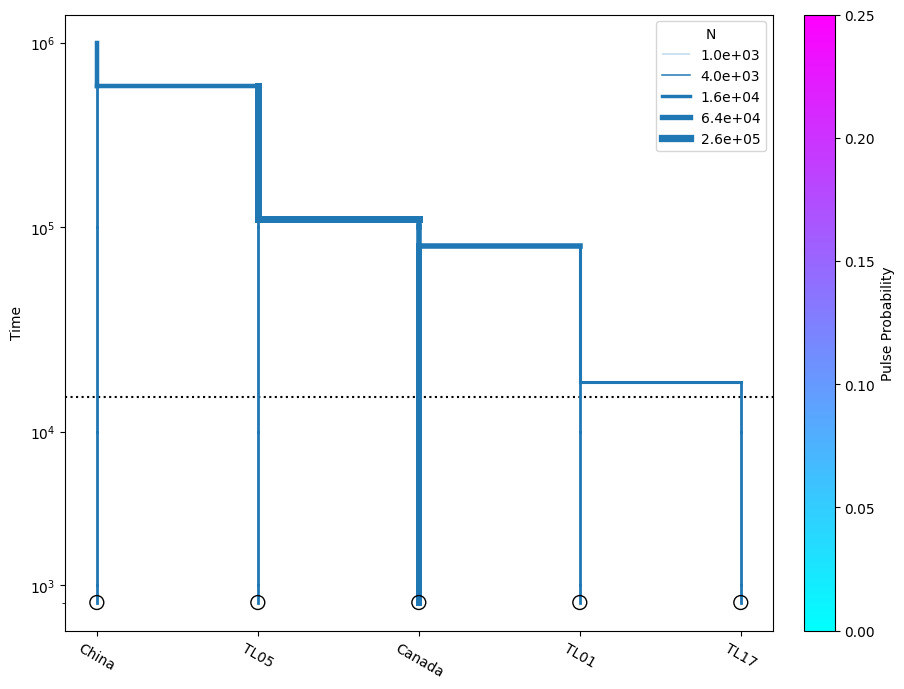

In [7]:


yticks = [1e3, 1e4, 1e5, 1e6]
fig = momi.DemographyPlot(
    model, ["China", "TL05", "Canada", "TL01", "TL17"],
    figsize=(10,8),
    major_yticks=yticks,
    linthreshy=12e3, pulse_color_bounds=(0,.25))


In [5]:
results = []
model_copy = model.copy()
model_copy.set_params(model.get_params(),randomize=True)
results.append(model_copy.optimize(method="L-BFGS-B"),options={'maxiter': 2,"ftol":1e-7})

TypeError: append() takes no keyword arguments

In [ ]:
model.get_params()

#ParamsDict({'N_TL05A': 158543.01214788156, 't_split_china_TL05': 414623.1725988832, 'N_CandaA': 145993.67127790698, 't_split_Canada_TL05': 265080.75184354116, 'N_TL17A': 194069.14977019298, 't_split_TL01_canada': 26582.490570940572, 'N_TL01A': 101651.74967263064, 't_split_TL01_TL17': 1298.7083614682338}


# ParamsDict({'N_TL05A': 34520.08231482327, 't_split_china_TL05': 578792.158567274, 'N_CandaA': 205795.0342467004, 't_split_Canada_TL05': 111127.78281510531, 'N_TL17A': 73018.6688336438, 't_split_TL01_canada': 78739.16003975137, 'N_TL01A': 12372.922272252186, 't_split_TL01_TL17': 14601.97879520767})

ParamsDict({'N_TL05A': 34520.08231482327, 't_split_china_TL05': 578792.158567274, 'N_CandaA': 205795.0342467004, 't_split_Canada_TL05': 111127.78281510531, 'N_TL17A': 73018.6688336438, 't_split_TL01_canada': 78739.16003975137, 'N_TL01A': 12372.922272252186, 't_split_TL01_TL17': 14601.97879520767})